In [314]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_s_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [240]:
x, y = make_regression(n_samples=20, n_features=1, random_state=6, noise=70, bias=100.0)
x_transform=[]
for i in range(0,len(x)):
    x_transform.append(x[i][0])

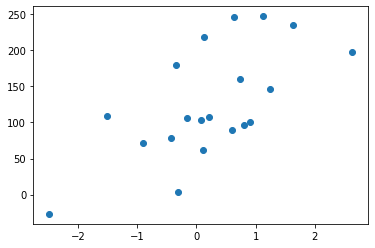

In [241]:
plt.scatter(x,y)

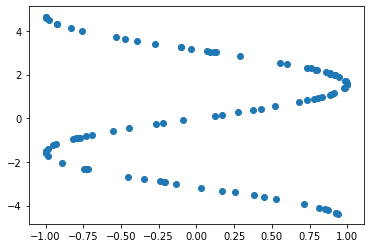

In [242]:
data, color= make_s_curve(100, random_state=6)
plt.scatter(data[:,0], color)

In [243]:
model=LinearRegression()
model.fit(x, y)
print(model.coef_)
print(model.intercept_)

[44.14917853]
116.32124513003752


In [244]:
predictions=model.predict(x)
print(y[2])
print(predictions[2])

71.60453584903851
76.62708088577993


In [245]:
print(y)

[  4.07631251 146.74629232  71.60453585  96.44708183  88.99591804
 109.33817083 179.87804289 -26.83163286 218.85644794  61.91377258
 107.97106597 246.37258518 106.82592819 235.47868492 197.34757906
 100.25901588 103.59529621  79.07151591 159.75012057 247.37305146]


In [246]:
pairlist=[]
for i in range(0,len(predictions)):
    pairlist.append(f"{x[i]},{predictions[i]}")

In [247]:
df=pd.DataFrame({"X": x_transform, "Y": y, "Predicted Y": predictions, "Error": predictions - y})[["X", "Y","Predicted Y", "Error"]]

In [248]:
df_goodvalues=["min y", y.min(), "max y", y.max(), "min x", x.min(), "max x", x.max(), "min error", df["Error"].min(), "max error", df["Error"].max(), "MSE",df["Error"].mean()]
print(df_goodvalues)

['min y', -26.83163286079919, 'max y', 247.37305146037062, 'min x', -2.486780651627865, 'max x', 2.631280557263819, 'min error', -102.05081213958752, 'max error', 98.47993955261366, 'MSE', 2.6290081223123708e-14]


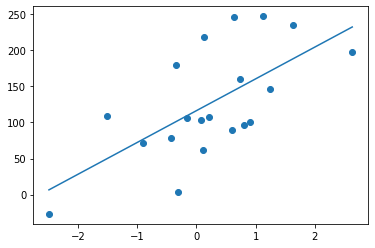

In [249]:
#this plots the fit line. 
x_min=np.array([[x.min()]])
x_max=np.array([[x.max()]])
y_min=model.predict(x_min)
y_max=model.predict(x_max)

plt.scatter(x,y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]])

In [254]:
predicted=model.predict(x)
mse=mean_squared_error(y,predicted)
r2=r2_score(y,predicted)

In [255]:
print(r2)

0.4182105606618082


In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6)
tpredicted=model.fit(x_train, y_train)
predicted=model.predict(x_test)
tmse=mean_squared_error(y_test, predicted)
tr2=r2_score(y_test, predicted)

ValueError: x and y must be the same size

In [198]:
gss=pd.read_csv("GSS_1996.csv", encoding="latin1")

In [199]:
#Clean the data
##drop cases with no answer, not asked, and don't know on the DV
badanswers=["NA","IAP","DK"]
for answer in badanswers:
    dropindex = gss[ (gss['chnang7'] == answer)].index
    gss.drop(dropindex , inplace=True)
##drop cases with null values on the DV
gss=gss[gss["chnang7"].notna()]

In [200]:
gss["chnang7"].unique()

array(['didnt', 'did'], dtype=object)

In [201]:
#Make DV a dummy variable called pray_anger
pray_anger=[]
for answer in gss["chnang7"]:
    if answer=="didnt":
        pray_anger.append(0)
    elif answer=="did":
        pray_anger.append(1)
    else:
        print("Value Error: Please recode data to omit all values that are not 'did' or 'didn't'")

In [202]:
#Reshape the DV for sklearn
DVpray_anger=np.array(pray_anger)
DVpray_anger.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [298]:
#Create Dataframe to Catch Missing Values
df_missing=pd.DataFrame(columns=["Variable","Row"])

In [299]:
#################
#Recoding the IVs
#################

#Making Dummies... almost.
#We cannot recode dummy variables using the pandas get_dummies command because we want to preserve the missing data (coded .a) on each of the IVs. We are doing this so that we can multiply impute them later. Instead, we will manually loop through the data and document the location of missing values in a new dataframe.

##Sex (to dummy variable)

missingcounter=0
sex=[]
for answer in gss["sex"]:
    missingcounter+=1
    if answer=="male":
        sex.append(0)
    elif answer=="female":
        sex.append(1)
    elif answer==".a":
        race.append(answer)
        print(f"missing value on sex at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "sex", "Row": missingcounter}, ignore_index=True)
    else:
        print("Sex value error: {answer}.")

##Race(To dummy variable)
missingcounter=0
race=[]
for answer in gss["race"]:
    missingcounter+=1
    if answer=="white":
        race.append(0)
    elif answer=="black" or answer=="other":
        race.append(1)
    elif answer==".a":
        race.append(answer)
        print(f"missing value on race at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "race", "Row": missingcounter}, ignore_index=True)
    else:
        print("Race value error: {answer}.")
##Education(To dummy variable with having degree as reference category)
missingcounter=0
education=[]
for answer in gss["degree"]:
    missingcounter +=1
    if answer =="bachelor" or answer=="graduate":
        education.append(0)
    elif answer=="lt high" or answer =="high sch" or answer=="junior c":
        education.append(1)
    elif answer==".a":
        education.append(answer)
        print(f"missing value on education at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "education", "Row": missingcounter}, ignore_index=True)
    else:
        print(f"education value error: {answer}.")
missingcounter=0

missing value on education at row 165


In [338]:
df_testlogit=pd.DataFrame(list(zip(pray_anger,sex)), columns=["pray_anger","sex"])
df_testlogit.head()

,pray_anger,sex
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [321]:
#Train Test Split
#first parameter on tts is a set of dataframe columns with all and only the ivs. second is df collumn of only dv.
x_train, x_test, y_train, y_test = train_test_split(df_testlogit.drop(["pray_anger"], axis=1), df_testlogit["pray_anger"])


In [361]:
#train model
testmodel= LogisticRegression()
testmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
# scoring the model
testmodel.score(x_test, y_test)

0.6989247311827957

In [329]:
testmodel.score(x_train, y_train)

0.7293413173652694

In [362]:
testx = df_testlogit.sex.values.reshape(-1, 1)
testy = df_testlogit.pray_anger.values.reshape(-1, 1)


In [364]:
testy

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [365]:
newmodel=LogisticRegression()
newmodel.fit(testx,testy)
newmodel.predict(testx)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [366]:
#plot residuals non-trained model
predictions=newmodel.predict(testx)
plt.scatter(predictions, predictions-testy)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: x and y must be the same size

In [357]:
testy

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [330]:
#plot residuals
predictions=testmodel.predict(x_test)
plt.scatter(predictions, predictions-y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: operands could not be broadcast together with shapes (279,) (20,) 